In [171]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt

In [172]:
data = pd.read_csv("C:/Users/SUMANJALI/Desktop/codeclause/train_data.csv")

In [173]:
data.head()
data=data.dropna()

In [174]:
data.count()

Loan_ID              480
Gender               480
Married              480
Dependents           480
Education            480
Self_Employed        480
ApplicantIncome      480
CoapplicantIncome    480
LoanAmount           480
Loan_Amount_Term     480
Credit_History       480
Property_Area        480
Loan_Status          480
dtype: int64

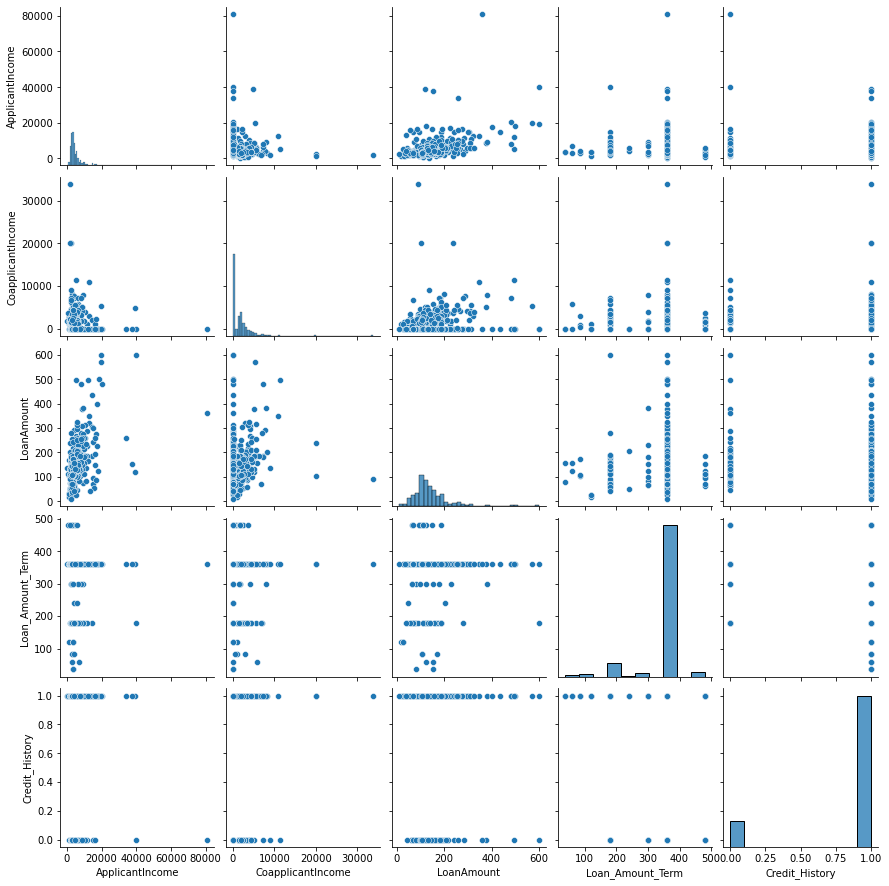

In [175]:
sns.pairplot(data)

In [176]:
print("frequent gender: " ,data['Gender'].mode())

frequent gender:  0    Male
Name: Gender, dtype: object


In [177]:
print("frequent employee status: " ,data['Self_Employed'].mode())

frequent employee status:  0    No
Name: Self_Employed, dtype: object


In [178]:
print("frequent married status: " ,data['Married'].mode())

frequent married status:  0    Yes
Name: Married, dtype: object


<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='LoanAmount'>

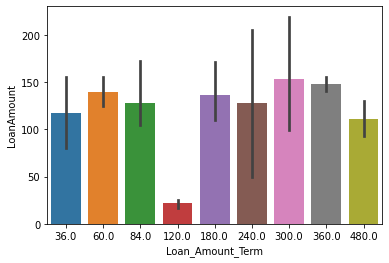

In [179]:
sns.barplot(x = data['Loan_Amount_Term'], y = data['LoanAmount'])

In [180]:
data['Dependents'].value_counts()

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

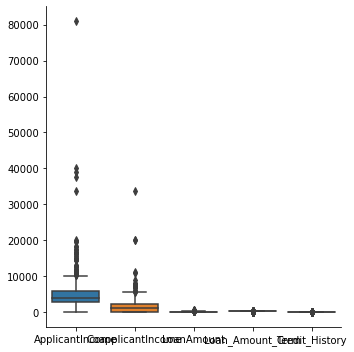

In [181]:

sns.catplot(data = data, kind = 'box')



In [182]:
data.describe()
data.drop(['Loan_ID'] ,axis=1 ,inplace=True)

In [183]:
obj_col = data.select_dtypes('object').columns
obj_col
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
data[obj_col] = data[obj_col].astype(str)
data[obj_col] = oe.fit_transform(data[obj_col])
data.head(3)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1.0,1.0,1.0,0.0,0.0,4583,1508.0,128.0,360.0,1.0,0.0,0.0
2,1.0,1.0,0.0,0.0,1.0,3000,0.0,66.0,360.0,1.0,2.0,1.0
3,1.0,1.0,0.0,1.0,0.0,2583,2358.0,120.0,360.0,1.0,2.0,1.0


In [184]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
data.iloc[:,:-1] = ss.fit_transform(data.iloc[:,:-1])
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,0.467198,0.737162,0.218599,-0.503253,-0.399275,-0.137970,-0.027952,-0.208089,0.275542,0.413197,-1.318868,0.0
2,0.467198,0.737162,-0.762033,-0.503253,2.504541,-0.417536,-0.604633,-0.979001,0.275542,0.413197,1.259774,1.0
3,0.467198,0.737162,-0.762033,1.987072,-0.399275,-0.491180,0.297100,-0.307562,0.275542,0.413197,1.259774,1.0
4,0.467198,-1.356553,-0.762033,-0.503253,-0.399275,0.112280,-0.604633,-0.046446,0.275542,0.413197,1.259774,1.0
5,0.467198,0.737162,1.199231,-0.503253,2.504541,0.009319,0.999978,1.520245,0.275542,0.413197,1.259774,1.0


In [185]:
x = data.iloc[:,:-1]
y = data.iloc[:,-1]
x.head()


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
1,0.467198,0.737162,0.218599,-0.503253,-0.399275,-0.137970,-0.027952,-0.208089,0.275542,0.413197,-1.318868
2,0.467198,0.737162,-0.762033,-0.503253,2.504541,-0.417536,-0.604633,-0.979001,0.275542,0.413197,1.259774
3,0.467198,0.737162,-0.762033,1.987072,-0.399275,-0.491180,0.297100,-0.307562,0.275542,0.413197,1.259774
4,0.467198,-1.356553,-0.762033,-0.503253,-0.399275,0.112280,-0.604633,-0.046446,0.275542,0.413197,1.259774
5,0.467198,0.737162,1.199231,-0.503253,2.504541,0.009319,0.999978,1.520245,0.275542,0.413197,1.259774


In [186]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y,random_state = 4, test_size = 0.25)

In [187]:
def mymodel(model):
    model.fit(xtrain,ytrain)
    ypred = model.predict(xtest)
    train_accuracy = model.score(xtrain,ytrain)
    test_accuracy = model.score(xtest, ytest)
    print(str(model)[:-2], 'Accuracy')
    print('Accuracy: ', accuracy_score(ytest,ypred), "\n Classification Report: \n", classification_report(ytest, ypred), '\nConfusion Matrix: \n', confusion_matrix(ytest, ypred))
    print('Training Accuracy: {train_accuracy} \n Testing Accuracy: {test_accuracy}')
    print()
    print()
    return model


In [188]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.svm import SVC
svc = mymodel(SVC())

SVC Accuracy
Accuracy:  0.7666666666666667 
 Classification Report: 
               precision    recall  f1-score   support

         0.0       0.86      0.42      0.56        43
         1.0       0.75      0.96      0.84        77

    accuracy                           0.77       120
   macro avg       0.80      0.69      0.70       120
weighted avg       0.79      0.77      0.74       120
 
Confusion Matrix: 
 [[18 25]
 [ 3 74]]
Training Accuracy: {train_accuracy} 
 Testing Accuracy: {test_accuracy}




In [190]:
from sklearn.linear_model import LogisticRegression
lr = mymodel(LogisticRegression())

LogisticRegression Accuracy
Accuracy:  0.7583333333333333 
 Classification Report: 
               precision    recall  f1-score   support

         0.0       0.85      0.40      0.54        43
         1.0       0.74      0.96      0.84        77

    accuracy                           0.76       120
   macro avg       0.79      0.68      0.69       120
weighted avg       0.78      0.76      0.73       120
 
Confusion Matrix: 
 [[17 26]
 [ 3 74]]
Training Accuracy: {train_accuracy} 
 Testing Accuracy: {test_accuracy}




SVC Accuracy
Accuracy:  0.7666666666666667 
 Classification Report: 
               precision    recall  f1-score   support

         0.0       0.86      0.42      0.56        43
         1.0       0.75      0.96      0.84        77

    accuracy                           0.77       120
   macro avg       0.80      0.69      0.70       120
weighted avg       0.79      0.77      0.74       120
 
Confusion Matrix: 
 [[18 25]
 [ 3 74]]
Training Accuracy: {train_accuracy} 
 Testing Accuracy: {test_accuracy}


